# Data analisis of .csv molecular docking screen


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats 
import warnings 
import seaborn as sns
from rdkit import Chem as ch
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
%matplotlib inline 

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
info = pd.read_csv("dock-scr.csv")

In [6]:
info


,row,cid,primera,segunda,tercera,cmpdname,cmpdsynonym,mw,mf,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,inchi,smiles,inchikey,iupacname,meshheadings,annothits,annothitcnt,aids,cidcdate,sidsrcname,depcatg,annotation
0,1,70680457,-6.8,-6.8,-6.7,"(2e)-3-(4-{[6-(1,3-Benzothiazol-5-Ylamino)-9h-...","(2e)-3-(4-{[6-(1,3-Benzothiazol-5-Ylamino)-9h-...",438.50,C23H18N8S,143.0,712,5.2,32,3,8,5,InChI=1S/C23H18N8S/c1-13-8-15(4-3-7-24)9-14(2)...,CC1=CC(=CC(=C1NC2=NC3=C(C(=N2)NC4=CC5=C(C=C4)S...,FZDPEDQCVGYRLP-ONEGZZNKSA-N,"(E)-3-[4-[[6-(1,3-benzothiazol-5-ylamino)-7H-p...",NaN,Biomolecular Interactions and Pathways|Names a...,2,NaN,20130117,Egon Willighagen (Dept. of Bioinformatics - Bi...,Curation Efforts|Governmental Organizations|Re...,NaN
1,2,70683270,-7.3,-7.1,-7.0,8-N-(cyclopropylmethyl)-4-N-(2-methylsulfonylp...,CHEMBL2017217|BDBM50380239,454.60,C21H26N8O2S,133.0,724,2.4,32,3,10,7,"InChI=1S/C21H26N8O2S/c1-32(30,31)16-5-3-2-4-15...",CS(=O)(=O)C1=CC=CC=C1NC2=NC(=NC3=C2N=CN=C3NCC4...,KRRZJPGYPJAWIF-UHFFFAOYSA-N,8-N-(cyclopropylmethyl)-4-N-(2-methylsulfonylp...,NaN,Biological Test Results|Classification,2,656473,20130204,BindingDB|ChEMBL,Curation Efforts|Research and Development,NaN
2,3,70687739,-7.5,-7.2,-7.0,N4-(3-chloro-4-fluorophenyl)-5-methyl-N2-(4-((...,CHEMBL2022966|SCHEMBL12964809|BDBM50382423|N4-...,440.90,C23H26ClFN6,56.3,540,4.7,31,2,7,6,InChI=1S/C23H26ClFN6/c1-16-14-26-23(29-22(16)2...,CC1=CN=C(N=C1NC2=CC(=C(C=C2)F)Cl)NC3=CC=C(C=C3...,WJLWVXDGXZCYGK-UHFFFAOYSA-N,4-N-(3-chloro-4-fluorophenyl)-5-methyl-2-N-[4-...,NaN,Biological Test Results|Classification|Patents,3,658391,20130204,BindingDB|ChEMBL|Google Patents|IBM|NextMove S...,Curation Efforts|Governmental Organizations|Re...,NaN
3,4,70691692,-7.7,-7.3,-7.2,8-N-(cyclopropylmethyl)-4-N-(2-methylphenyl)-2...,CHEMBL2017238|BDBM50380271,391.50,C21H25N7O,88.1,527,3.3,29,2,8,6,InChI=1S/C21H25N7O/c1-14-4-2-3-5-16(14)25-20-1...,CC1=CC=CC=C1NC2=NC(=NC3=C2N=CN=C3NCC4CC4)N5CCOCC5,JUXAOIHETZHGAN-UHFFFAOYSA-N,8-N-(cyclopropylmethyl)-4-N-(2-methylphenyl)-2...,NaN,Biological Test Results|Classification,2,656473,20130204,BindingDB|ChEMBL,Curation Efforts|Research and Development,NaN
4,5,70695885,-8.3,-7.3,-7.2,8-N-(cyclopropylmethyl)-4-N-(4-methylsulfanylp...,CHEMBL2017216|BDBM50380248,422.60,C21H26N8S,116.0,535,3.2,30,3,9,7,InChI=1S/C21H26N8S/c1-30-16-6-4-15(5-7-16)26-2...,CSC1=CC=C(C=C1)NC2=NC(=NC3=C2N=CN=C3NCC4CC4)N5...,UAEPNLSYGYDOIJ-UHFFFAOYSA-N,8-N-(cyclopropylmethyl)-4-N-(4-methylsulfanylp...,NaN,Biological Test Results|Classification,2,656473,20130204,BindingDB|ChEMBL,Curation Efforts|Research and Development,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4573,4574,90389872,-6.2,-6.2,-6.2,N4-(4-methoxy-phenyl)-N2-(1-methyl-1H-pyrazol-...,SCHEMBL16012340|N4-(4-methoxy-phenyl)-N2-(1-me...,311.34,C15H17N7O,103.0,364,1.9,23,3,7,5,InChI=1S/C15H17N7O/c1-22-8-7-13(21-22)19-15-17...,CN1C=CC(=N1)NC2=NC=C(C(=N2)NC3=CC=C(C=C3)OC)N,CDKPUVGITZIIBO-UHFFFAOYSA-N,4-N-(4-methoxyphenyl)-2-N-(1-methylpyrazol-3-y...,NaN,Patents,1,NaN,20150213,Google Patents|IBM|NextMove Software|SureChEMBL,Curation Efforts|Research and Development,NaN
4574,4575,90389873,-7.2,-6.4,-6.0,"(1R,3R)-3-[3-(4-ethoxy-phenyl)-3H-[1,2,3]triaz...","SCHEMBL16012342|(1R,3R)-3-[3-(4-ethoxy-phenyl)...",368.40,C18H20N6O3,115.0,515,2.5,27,2,8,6,InChI=1S/C18H20N6O3/c1-2-27-14-7-5-13(6-8-14)2...,CCOC1=CC=C(C=C1)N2C3=NC(=NC=C3N=N2)N[C@@H]4CC[...,IPKVBVIURNWSCI-VXGBXAGGSA-N,"(1R,3R)-3-[[3-(4-ethoxyphenyl)triazolo[4,5-d]p...",NaN,Patents,1,NaN,20150213,Google Patents|NextMove Software|SureChEMBL,Curation Efforts|Research and Development,NaN
4575,4576,90389874,-7.1,-7.1,-7.0,"(1S,3S)-3-[[3-(4-propan-2-yloxyphenyl)triazolo...",SCHEMBL16012343,354.40,C18H22N6O2,98.0,459,2.8,26,2,7,5,InChI=1S/C18H22N6O2/c1-11(2)26-15-7-4-13(5-8-1...,CC(C)OC1=CC=C(C=C1)N2C3=NC(=NC=C3N=N2)N[C@H]4C...,KHMQFTSPQSOVKF-JSGCOSHPSA-N,"(1S,3S)-3-[[3-(4-propan-2-yloxyphenyl)tria

In [7]:
info.shape


(4578, 28)

In [8]:
info.describe()

,row,cid,primera,segunda,tercera,mw,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds,meshheadings,annothitcnt,cidcdate,annotation
count,4578.000000,4.578000e+03,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,4578.000000,0.0,4578.000000,4.578000e+03,0.0
mean,2289.500000,8.193501e+07,-7.717628,-7.420686,-7.226496,453.814226,104.779421,681.926606,3.636282,32.494539,2.538008,8.019004,5.330275,NaN,1.397990,2.014232e+07,NaN
std,1321.699096,8.608165e+06,0.855913,0.795515,0.759232,79.020837,26.374400,174.290361,1.408149,5.505958,1.090997,1.903239,1.511924,NaN,0.515197,9.211812e+03,NaN
min,1.000000,7.068046e+07,-11.000000,-10.900000,-10.800000,228.290000,32.299000,219.000000,-2.900000,17.000000,0.000000,2.000000,0.000000,NaN,0.000000,2.013012e+07,NaN
25%,1145.250000,7.126898e+07,-8.300000,-7.900000,-7.700000,397.900000,87.800000,556.000000,2.700000,29.000000,2.000000,7.000000,4.000000,NaN,1.000000,2.013032e+07,NaN
50%,2289.500000,8.724833e+07,-7.600000,-7.300000,-7.100000,448.400000,104.000000,668.000000,3.600000,32.000000,3.000000,8.000000,6.000000,NaN,1.000000,2.015021e+07,NaN
75%,3433.750000,8.962768e+07,-7.100000,-6.900000,-6.700000,506.600000,122.000000,793.000000,4.500000,36.000000,3.000000,9.000000,7.000000,NaN,2.000000,2.015021e+07,NaN
max,4578.000000,9.038988e+07,-5.200000,-5.100000,-5.000000,696.600000,217.000000,1310.000000,11.700000,50.000000,6.000000,18.000000,7.000000,NaN,5.000000,2.015021e+07,NaN


### correlation matrix

In [9]:
cormat = info.corr()

<AxesSubplot:>

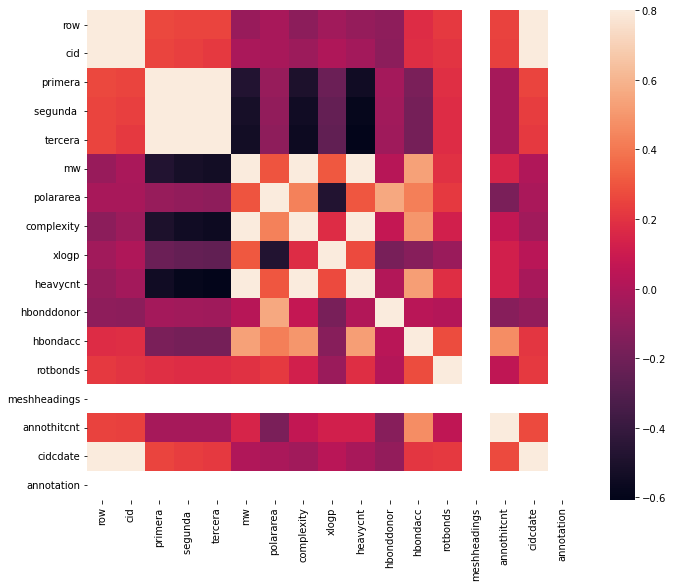

In [11]:
f , ax = plt.subplots(figsize =(12,9))
sns.heatmap(cormat,vmax=0.8 ,square=True)

In [14]:
k=10


In [15]:
cormat = info.corr()
cols = cormat.nlargest(k, "primera")["primera"].index

In [16]:
cols


Index(['primera', 'segunda ', 'tercera', 'row', 'cid', 'cidcdate', 'rotbonds',
       'annothitcnt', 'hbonddonor', 'polararea'],
      dtype='object')

In [17]:
cm = np.corrcoef(info[cols].values.T)

In [18]:
cm

array([[ 1.        ,  0.94206193,  0.91909388,  0.26185646,  0.25320578,
         0.25225571,  0.18572636, -0.0276879 , -0.0320035 , -0.07452589],
       [ 0.94206193,  1.        ,  0.97048569,  0.25409491,  0.23471066,
         0.23135425,  0.17516303, -0.02820576, -0.04454501, -0.09135051],
       [ 0.91909388,  0.97048569,  1.        ,  0.2515645 ,  0.22313377,
         0.22025205,  0.17574656, -0.02453416, -0.05041638, -0.10108765],
       [ 0.26185646,  0.25409491,  0.2515645 ,  1.        ,  0.91077289,
         0.88663538,  0.22090339,  0.245382  , -0.10542719, -0.01957661],
       [ 0.25320578,  0.23471066,  0.22313377,  0.91077289,  1.        ,
         0.97841902,  0.20577955,  0.24144127, -0.10676715, -0.0220286 ],
       [ 0.25225571,  0.23135425,  0.22025205,  0.88663538,  0.97841902,
         1.        ,  0.2206598 ,  0.26758574, -0.08859253, -0.01440626],
       [ 0.18572636,  0.17516303,  0.17574656,  0.22090339,  0.20577955,
         0.2206598 ,  1.        ,  0.05504281

In [27]:
sns.set(font_scale= 1.25)

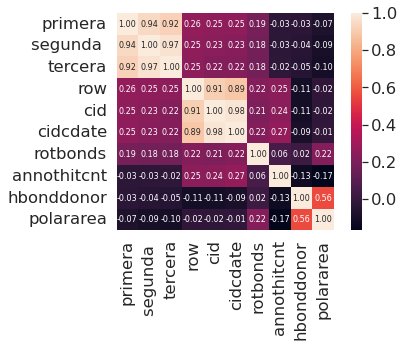

In [24]:
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={'size': 8}, yticklabels=cols.values ,xticklabels=cols.values)

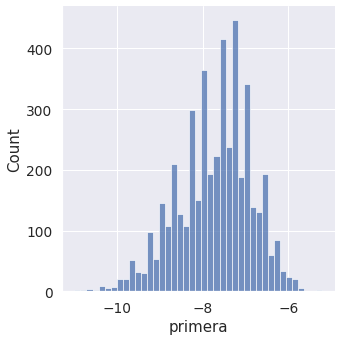

In [135]:
sns.displot(info["primera"])
plt.show()

In [117]:
data = info[["row","primera","mw","polararea","complexity","xlogp","heavycnt","hbonddonor","hbondacc","rotbonds"]]
data

,row,primera,mw,polararea,complexity,xlogp,heavycnt,hbonddonor,hbondacc,rotbonds
0,1,-6.8,438.50,143.0,712,5.2,32,3,8,5
1,2,-7.3,454.60,133.0,724,2.4,32,3,10,7
2,3,-7.5,440.90,56.3,540,4.7,31,2,7,6
3,4,-7.7,391.50,88.1,527,3.3,29,2,8,6
4,5,-8.3,422.60,116.0,535,3.2,30,3,9,7
...,...,...,...,...,...,...,...,...,...,...
4573,4574,-6.2,311.34,103.0,364,1.9,23,3,7,5
4574,4575,-7.2,368.40,115.0,515,2.5,27,2,8,6
4575,4576,-7.1,354.40,98.0,459,2.8,26,2,7,5
4576,4577,-6.8,354.40,98.0,459,2.8,26,2,7,5


### mw vs Afinity(primera) plot

In [115]:
var = "mw"

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='mw', ylabel='primera'>

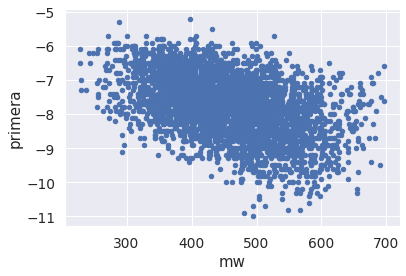

In [116]:
data.plot.scatter(x=var , y = "primera")

### polar area vs Afinity(primera) plot

In [118]:
var = "polararea"

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='polararea', ylabel='primera'>

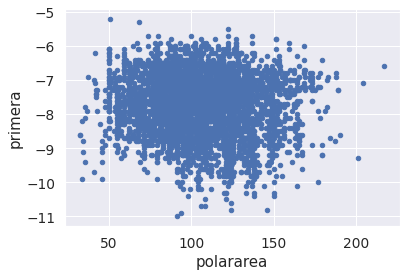

In [119]:
data.plot.scatter(x=var , y = "primera")

### complexity vs Afinity(primera) plot

In [122]:
var = "complexity"

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='complexity', ylabel='primera'>

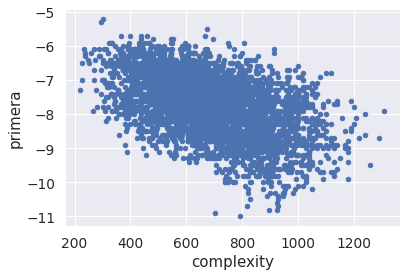

In [123]:
data.plot.scatter(x=var , y = "primera")

### xlogp vs Afinity(primera) plot

In [124]:
var = "xlogp"

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='xlogp', ylabel='primera'>

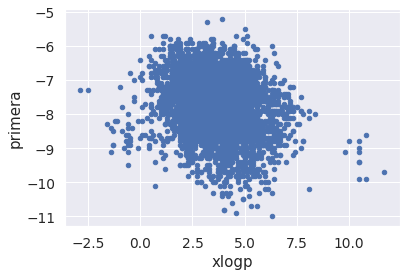

In [125]:
data.plot.scatter(x=var , y = "primera")

### heavy atom count vs Afinity(primera) plot

In [126]:
var = "heavycnt"

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='heavycnt', ylabel='primera'>

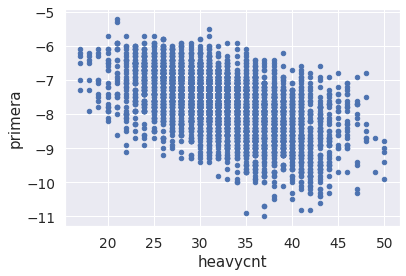

In [127]:
data.plot.scatter(x=var , y = "primera")

### h bond donor vs Afinity(primera) plot

In [128]:
var = "hbonddonor"

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='hbonddonor', ylabel='primera'>

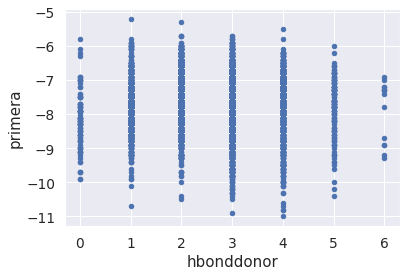

In [129]:
data.plot.scatter(x=var , y = "primera")

### h bond aceptor vs Afinity(primera) plot

In [130]:
var = "hbondacc"

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='hbondacc', ylabel='primera'>

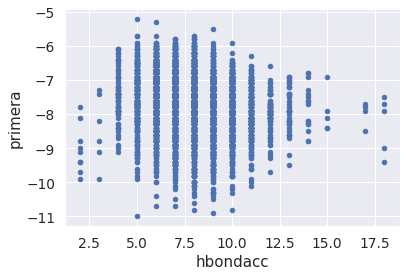

In [131]:
data.plot.scatter(x=var , y = "primera")

### rotatable bonds vs Afinity(primera) plot

In [132]:
var = "rotbonds"

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='rotbonds', ylabel='primera'>

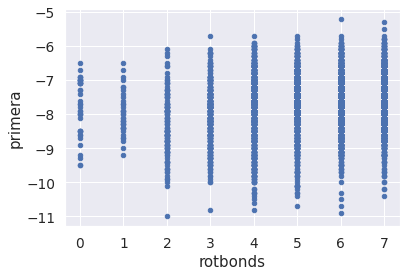

In [133]:
data.plot.scatter(x=var , y = "primera")

In [85]:
primera_smiles = info[["row","primera","smiles"]]

In [86]:
primera_smiles

,row,primera,smiles
0,1,-6.8,CC1=CC(=CC(=C1NC2=NC3=C(C(=N2)NC4=CC5=C(C=C4)S...
1,2,-7.3,CS(=O)(=O)C1=CC=CC=C1NC2=NC(=NC3=C2N=CN=C3NCC4...
2,3,-7.5,CC1=CN=C(N=C1NC2=CC(=C(C=C2)F)Cl)NC3=CC=C(C=C3...
3,4,-7.7,CC1=CC=CC=C1NC2=NC(=NC3=C2N=CN=C3NCC4CC4)N5CCOCC5
4,5,-8.3,CSC1=CC=C(C=C1)NC2=NC(=NC3=C2N=CN=C3NCC4CC4)N5...
...,...,...,...
4573,4574,-6.2,CN1C=CC(=N1)NC2=NC=C(C(=N2)NC3=CC=C(C=C3)OC)N
4574,4575,-7.2,CCOC1=CC=C(C=C1)N2C3=NC(=NC=C3N=N2)N[C@@H]4CC[...
4575,4576,-7.1,CC(C)OC1=CC=C(C=C1)N2C3=NC(=NC=C3N=N2)N[C@H]4C...
4576,4577,-6.8,CC(C)OC1=CC=C(C=C1)N2C3=NC(=NC=C3N=N2)N[C@@H]4...


molecule affinity lower than -10.5

In [88]:
primera_smiles[primera_smiles.primera < -10.5]

,row,primera,smiles
263,264,-11.0,CC1=CN=C2NC3=CC=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)...
346,347,-10.8,CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)...
355,356,-10.8,CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)...
364,365,-10.6,CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)...
792,793,-10.7,CC1=CC=CC=C1NC(=O)C2=CC=C(C=C2)NC3=NC(=NC=C3Cl...
2619,2620,-10.9,CC1=C(C(=CC(=C1F)F)[C@H](C)NC2=NC=CC(=N2)N3C4=...
2621,2622,-10.7,C[C@@H](C1=CC(=CC=C1)[N+](=O)[O-])NC2=NC=CC(=N...


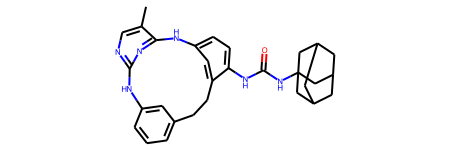

In [91]:
ch.MolFromSmiles("CC1=CN=C2NC3=CC=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NC(=O)NC56CC7CC(C5)CC(C7)C6")

### Next molecule has a good insertion in the protein

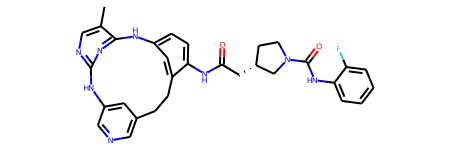

In [92]:
ch.MolFromSmiles("CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NC(=O)C[C@@H]5CCN(C5)C(=O)NC6=CC=CC=C6F")

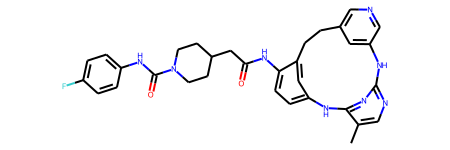

In [93]:
ch.MolFromSmiles("CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NC(=O)CC5CCN(CC5)C(=O)NC6=CC=C(C=C6)F")

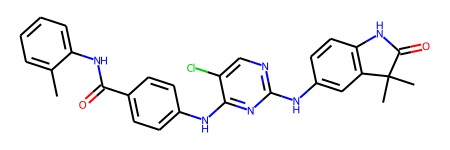

In [94]:
ch.MolFromSmiles("CC1=CC=CC=C1NC(=O)C2=CC=C(C=C2)NC3=NC(=NC=C3Cl)NC4=CC5=C(C=C4)NC(=O)C5(C)C")

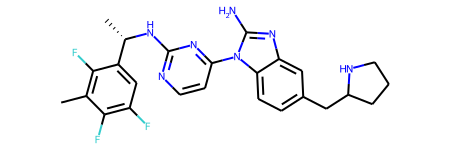

In [95]:
ch.MolFromSmiles("CC1=C(C(=CC(=C1F)F)[C@H](C)NC2=NC=CC(=N2)N3C4=C(C=C(C=C4)CC5CCCN5)N=C3N)F")

### Next molecule has a good insertion in the protein

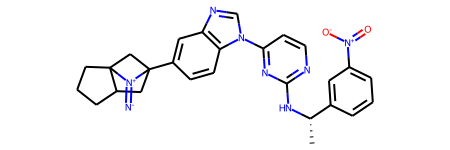

In [96]:
ch.MolFromSmiles("C[C@@H](C1=CC(=CC=C1)[N+](=O)[O-])NC2=NC=CC(=N2)N3C=NC4=C3C=CC(=C4)C56CC7CCCC7(C5)[N+]6=[N-]")

molecule affinity between -10 y -10.5

In [109]:
between = primera_smiles[primera_smiles.primera < -10]
between[between.primera >= -10.5]

,row,primera,smiles
212,213,-10.3,CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)...
221,222,-10.3,CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)...
224,225,-10.2,CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)...
225,226,-10.4,CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)...
227,228,-10.1,CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)...
243,244,-10.3,CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)...
250,251,-10.3,CC1=CC(=NO1)C(=O)N2CCC(CC2)CCC(=O)NC3=C4CCC5=C...
280,281,-10.1,CC1=CN=C2NC3=CC(=CC(=C3)C4=CN=C(C=C4)N5CCN(CC5...
291,292,-10.2,CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)...
307,308,-10.5,CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)...


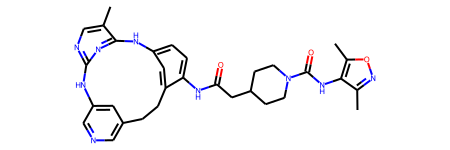

In [7]:
ch.MolFromSmiles("CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NC(=O)CC5CCN(CC5)C(=O)NC6=C(ON=C6C)C")

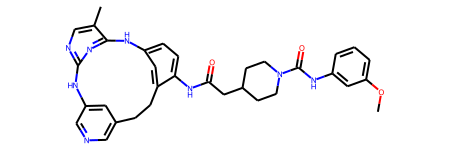

In [9]:
ch.MolFromSmiles("CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NC(=O)CC5CCN(CC5)C(=O)NC6=CC(=CC=C6)OC")

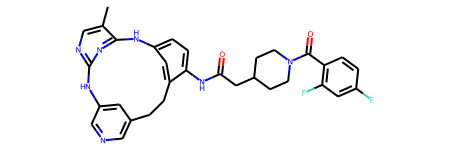

In [10]:
ch.MolFromSmiles("CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NC(=O)CC5CCN(CC5)C(=O)C6=C(C=C(C=C6)F)F")

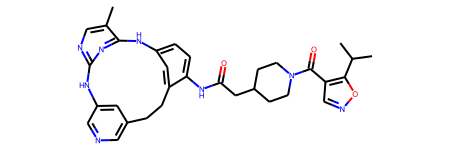

In [27]:
ch.MolFromSmiles("CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NC(=O)CC5CCN(CC5)C(=O)C6=C(ON=C6)C(C)C")

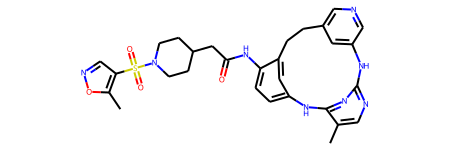

In [28]:
ch.MolFromSmiles("CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NC(=O)CC5CCN(CC5)S(=O)(=O)C6=C(ON=C6)C")

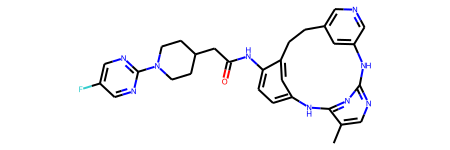

In [29]:
ch.MolFromSmiles("CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NC(=O)CC5CCN(CC5)C6=NC=C(C=N6)F")

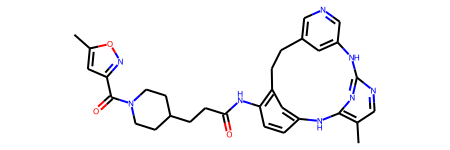

In [30]:
ch.MolFromSmiles("CC1=CC(=NO1)C(=O)N2CCC(CC2)CCC(=O)NC3=C4CCC5=CC(=CN=C5)NC6=NC=C(C(=N6)NC(=C4)C=C3)C")

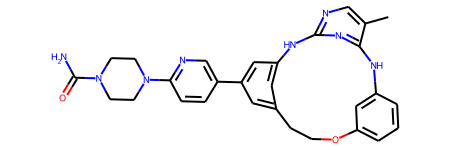

In [31]:
ch.MolFromSmiles("CC1=CN=C2NC3=CC(=CC(=C3)C4=CN=C(C=C4)N5CCN(CC5)C(=O)N)CCOC6=CC=CC(=C6)NC1=N2")

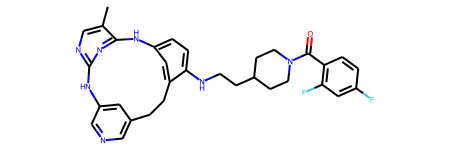

In [51]:
ch.MolFromSmiles("CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NCCC5CCN(CC5)C(=O)C6=C(C=C(C=C6)F)F")

### Next molecule has a good insertion in the protein

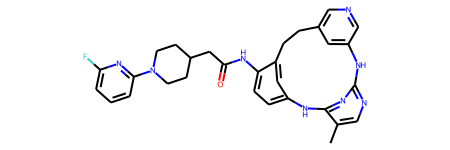

In [33]:
ch.MolFromSmiles("CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NC(=O)CC5CCN(CC5)C6=NC(=CC=C6)F")

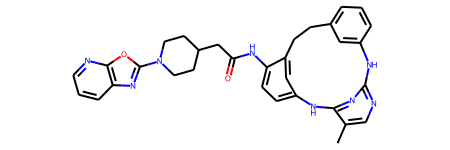

In [34]:
ch.MolFromSmiles("CC1=CN=C2NC3=CC=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NC(=O)CC5CCN(CC5)C6=NC7=C(O6)N=CC=C7")

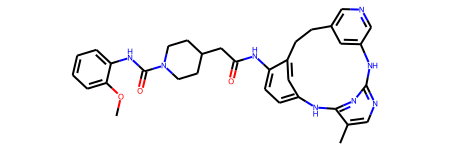

In [35]:
ch.MolFromSmiles("CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NC(=O)CC5CCN(CC5)C(=O)NC6=CC=CC=C6OC")

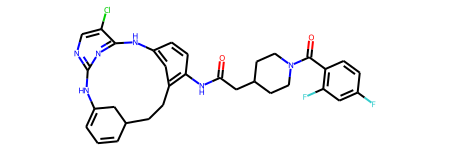

In [36]:
ch.MolFromSmiles("C1CC2=C(C=CC(=C2)NC3=NC(=NC=C3Cl)NC4=CC=CC1C4)NC(=O)CC5CCN(CC5)C(=O)C6=C(C=C(C=C6)F)F")

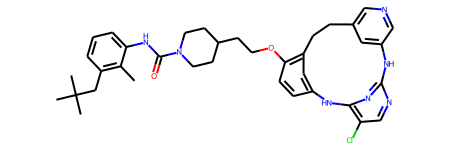

In [37]:
ch.MolFromSmiles("CC1=C(C=CC=C1NC(=O)N2CCC(CC2)CCOC3=C4CCC5=CC(=CN=C5)NC6=NC=C(C(=N6)NC(=C4)C=C3)Cl)CC(C)(C)C")

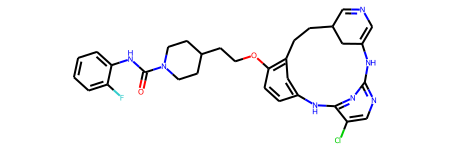

In [38]:
ch.MolFromSmiles("C1CC2=C(C=CC(=C2)NC3=NC(=NC=C3Cl)NC4=CN=CC1C4)OCCC5CCN(CC5)C(=O)NC6=CC=CC=C6F")

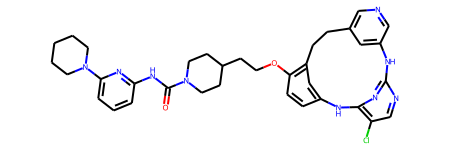

In [39]:
ch.MolFromSmiles("C1CCN(CC1)C2=CC=CC(=N2)NC(=O)N3CCC(CC3)CCOC4=C5CCC6=CC(=CN=C6)NC7=NC=C(C(=N7)NC(=C5)C=C4)Cl")

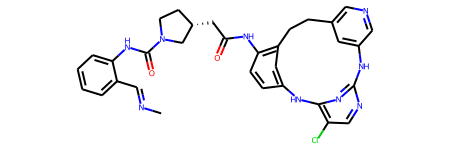

In [44]:
ch.MolFromSmiles("CN=CC1=CC=CC=C1NC(=O)N2CC[C@@H](C2)CC(=O)NC3=C4CCC5=CC(=CN=C5)NC6=NC=C(C(=N6)NC(=C4)C=C3)Cl")

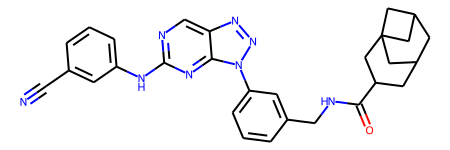

In [45]:
ch.MolFromSmiles("C1C2CC(CC3(C2)CC1C3)C(=O)NCC4=CC(=CC=C4)N5C6=NC(=NC=C6N=N5)NC7=CC=CC(=C7)C#N")

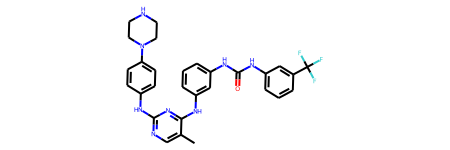

In [46]:
ch.MolFromSmiles("CC1=CN=C(N=C1NC2=CC(=CC=C2)NC(=O)NC3=CC=CC(=C3)C(F)(F)F)NC4=CC=C(C=C4)N5CCNCC5")

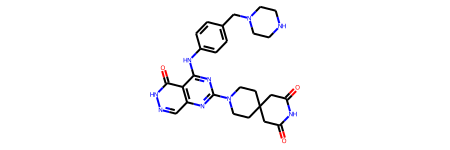

In [47]:
ch.MolFromSmiles("C1CN(CCC12CC(=O)NC(=O)C2)C3=NC4=C(C(=O)NN=C4)C(=N3)NC5=CC=C(C=C5)CN6CCNCC6")

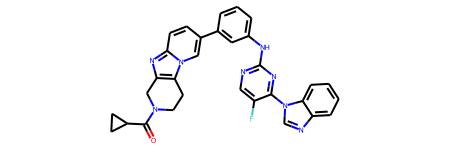

In [55]:
ch.MolFromSmiles("C1CC1C(=O)N2CCC3=C(C2)N=C4N3C=C(C=C4)C5=CC(=CC=C5)NC6=NC=C(C(=N6)N7C=NC8=CC=CC=C87)F")

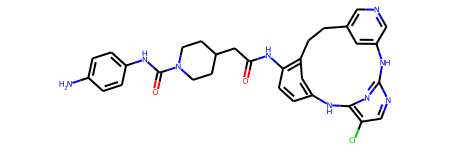

In [54]:
ch.MolFromSmiles("C1CN(CCC1CC(=O)NC2=C3CCC4=CC(=CN=C4)NC5=NC=C(C(=N5)NC(=C3)C=C2)Cl)C(=O)NC6=CC=C(C=C6)N")

### Next molecule has a good insertion in the protein

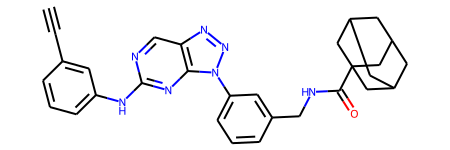

In [53]:
ch.MolFromSmiles("C#CC1=CC(=CC=C1)NC2=NC=C3C(=N2)N(N=N3)C4=CC=CC(=C4)CNC(=O)C56CC7CC(C5)CC(C7)C6")

## Best molecules 

In [66]:
molecules = ["CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NC(=O)C[C@@H]5CCN(C5)C(=O)NC6=CC=CC=C6F" , "C[C@@H](C1=CC(=CC=C1)[N+](=O)[O-])NC2=NC=CC(=N2)N3C=NC4=C3C=CC(=C4)C56CC7CCCC7(C5)[N+]6=[N-]",
"CC1=CN=C2NC3=CN=CC(=C3)CCC4=C(C=CC(=C4)NC1=N2)NC(=O)CC5CCN(CC5)C6=NC(=CC=C6)F" , "C#CC1=CC(=CC=C1)NC2=NC=C3C(=N2)N(N=N3)C4=CC=CC(=C4)CNC(=O)C56CC7CC(C5)CC(C7)C6"]

In [67]:

mol_list = [ch.MolFromSmiles(smiles) for smiles in molecules]

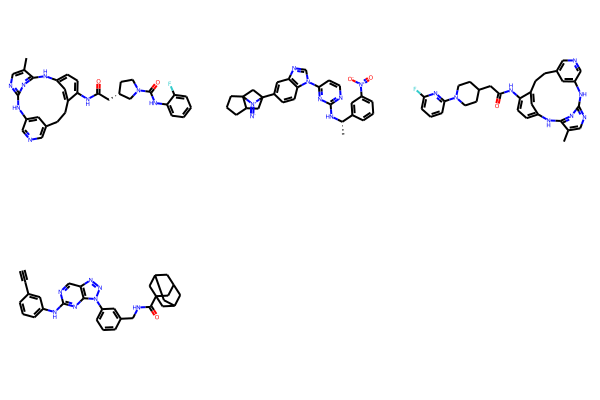

In [71]:
ch.Draw.MolsToGridImage(mol_list)
